In [1]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import pandas as pd
#from math import *
from datetime import datetime
from matplotlib.transforms import offset_copy
from matplotlib.ticker import FormatStrFormatter
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopy.distance
from scipy.stats import norm
import drone


plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams.update({'font.size': 16})

# uBlox GPS log file processing
Annie Polish, March 2021

---
## Reading in a file

Index(['iTOW', 'UTC', 'tAcc', 'Lon', 'Lat', 'Height', 'HMSL', 'hAcc', 'vAcc',
       'pDOP', 'numSV', 'velN', 'velE', 'velD', 'gspeed', 'headmot', 'sAcc',
       'headAcc', 'fixType', 'fixOK', 'UTCvalid', 'HPvalid', 'carrierSoln',
       'diffCorrected', 'pitch', 'roll', 'yaw'],
      dtype='object')


(41.320597253, 41.321047526)

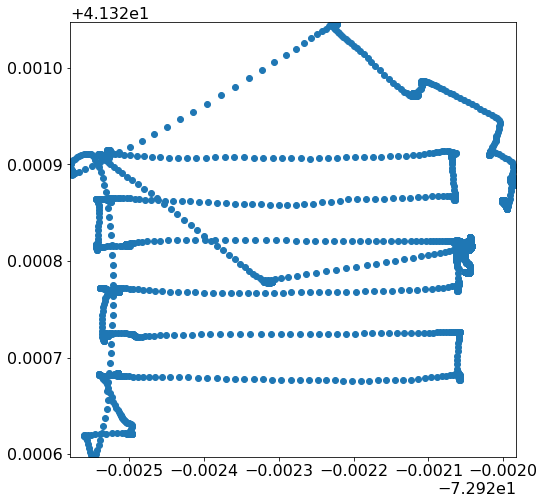

In [2]:
# read in a file using the default pandas read_csv
df = pd.read_csv("./04052022",sep=",",header=0)

# turn the timestamps into real datetime objects
df = df.assign(UTC = pd.to_datetime(df.UTC))

print(df.columns)
    
# make a quick scatter plot
fig = plt.figure()
plt.scatter(df.Lon, df.Lat)
plt.xlim(min(df.Lon), max(df.Lon))
plt.ylim(min(df.Lat), max(df.Lat))

In [2]:
NAME = "FLY397"
drone.process_files([NAME])

/home/annie/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


203179
203179
Index(['Lat', 'Lon', 'hmsl', 'sec_elapsed', 'datetimestamp', 'tick', 'vel',
       'yaw_rtk', 'pitch_rtk', 'pitch', 'roll', 'yaw', 'yaw_360', 'IMU_lat',
       'IMU_lon', 'IMU_hmsl', 'no_rtk_lat', 'no_rtk_lon', 'timestamp'],
      dtype='object')
STAPLING...
FLY397_
Saved NPZ
Saved CSV


Lat        Lon       hmsl  sec_elapsed         datetimestamp  \
0            NaN        NaN        NaN     -422.751                   NaN   
1            NaN        NaN        NaN     -396.900  2021-04-14T20:58:09Z   
2            NaN        NaN        NaN     -396.889  2021-04-14T20:58:09Z   
3            NaN        NaN        NaN     -396.879  2021-04-14T20:58:09Z   
4            NaN        NaN        NaN     -396.869  2021-04-14T20:58:09Z   
...          ...        ...        ...          ...                   ...   
203174  40.86973 -72.866027  191.46388     1709.666                   NaN   
203175  40.86973 -72.866027  191.46388     1709.676                   NaN   
203176  40.86973 -72.866027  191.46388     1709.686                   NaN   
203177  40.86973 -72.866027  191.46388     1709.696                   NaN   
203178  40.86973 -72.866027  191.46388     1709.706                   NaN   

              tick       vel  yaw_rtk  pitch_rtk      pitch      roll  \
0                0       NaN      NaN        NaN        NaN       NaN   
1        116328743  0.000000      NaN        NaN  -1.948607 -0.167956   
2        116380183  0.000000      NaN        NaN  -1.948229 -0.167672   
3        116425331  0.000000      NaN        NaN  -1.948703 -0.166441   
4        116470497  0.000000      NaN        NaN  -1.949056 -0.165566   
...            ...       ...      ...        ...        ...       ...   
203174  9595878343  0.010106    273.0  -7.303209 -18.409189 -2.125720   
203175  9595923500  0.010375    273.0  -7.303209 -18.410013 -2.126202   
203176  9595968534  0.011559    273.0  -7.303209 -18.409964 -2.126487   
203177  9596013553  0.013383    273.0  -7.303209 -18.409644 -2.126725   
203178  9596058565  0.014908    273.0  -7.303209 -18.410651 -2.127983   

               yaw     yaw_360    IMU_lat    IMU_lon    IMU_hmsl  no_rtk_lat  \
0              NaN         NaN        NaN        NaN         NaN         NaN   
1       111.995474  111.995474   0.000000   0.000000    0.000000   41.320881   
2       111.994443  111.994443   0.000000   0.000000    0.000000   41.320881   
3       111.992517  111.992517   0.000000   0.000000    0.000000   41.320881   
4       111.992721  111.992721   0.000000   0.000000    0.000000   41.320881   
...            ...         ...        ...        ...         ...         ...   
203174  146.304660  146.304660  41.321093 -72.922517 -103.909615   41.336882   
203175  146.306205  146.306205  41.321093 -72.922517 -103.909615   41.336882   
203176  146.305691  146.305691  41.321093 -72.922517 -103.909615   41.336882   
203177  146.305558  146.305558  41.321093 -72.922517 -103.909615   41.336882   
203178  146.307150  146.307150  41.321093 -72.922517 -103.909615   41.336882   

        no_rtk_lon               timestamp  
0              NaN                     NaT  
1       -72.922286 2021-04-14 20:58:09.000  
2       -72.922286 2021-04-14 20:58:09.017  
3       -72.922286 2021-04-14 20:58:09.035  
4       -72.922286 2021-04-14 20:58:09.053  
...            ...                     ...  
203174  -72.954214                     NaT  
203175  -72.954214                     NaT  
203176  -72.954214                     NaT  
203177  -72.954214                     NaT  
203178  -72.954214                     NaT  

[203179 rows x 19 columns]

In [5]:
# read in the DJI file
dji_df = pd.read_csv("./csv_out/FLY397_processed.csv", sep=',', header=0)
dji_df = dji_df.assign(LonMov=dji_df.Lon-0.000025)
dji_df = dji_df.assign(LatMov=dji_df.Lat+0.000045)
dji_df = dji_df.assign(UTC = pd.to_datetime(dji_df.datetimestamp))

print(dji_df.columns)
print(len(dji_df.Lat))

Index(['Unnamed: 0', 'Lat', 'Lon', 'hmsl', 'sec_elapsed', 'datetimestamp',
       'tick', 'vel', 'yaw_rtk', 'pitch_rtk', 'pitch', 'roll', 'yaw',
       'yaw_360', 'IMU_lat', 'IMU_lon', 'IMU_hmsl', 'no_rtk_lat', 'no_rtk_lon',
       'timestamp', 'LonMov', 'LatMov', 'UTC'],
      dtype='object')
203179


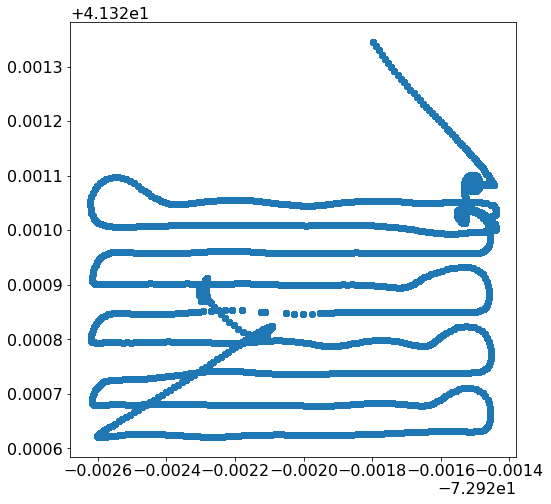

In [43]:
plt.figure()
sr = 0; st = 78000;
#plt.scatter(dji_df.Lon[sr:st], dji_df.Lat[sr:st])
#plt.scatter(dji_df.IMU_lon[sr:st], dji_df.IMU_lat[sr:st])
plt.scatter(dji_df.no_rtk_lon[sr:st], dji_df.no_rtk_lat[sr:st])
plt.show()

## Column descriptions
* **iTOW**: GPS time of week in milliseconds
* **UTC**: UTC timestamp
* **tAcc**: Time accuracy estimate in nanoseconds
* **Lon**: Longitude in decimal degrees
* **Lat**: Latitude in decimal degrees
* **Height**: Height above the WGS84 ellipsoid in meters
* **HMSL**: Height above mean sea level in meters
* **hAcc**: Horizontal accuracy estimate in millimeters
* **vAcc**: Vertical accuracy estimate in millimeters
* **pDOP**: Position dilution of precision * 100 (unitless measurement of the quality of the current arrangement of satellites overhead)
* **numSV**: Number of satellites currently connected
* **velN, velE, velD**: Velocity in mm/s in NED coordinates
* **gspeed**: 2D ground speed in mm/s
* **headmot**: Heading of motion (note that this is from GPS only, not an IMU, and is not very accurate)
* **sAcc**: Speed accuracy estimate in mm/s
* **headAcc**: Heading accuracy estimate in degrees
* **fixType**: 0 for no fix, 1 for dead-reckoning, 2 for 2D fix, 3 for 3D fix, 4 for GNSS+dead reckoning, 5 for time-only. The ideal value is 3.
* **fixOK**: 1 if the fix is "OK", 0 if not. 
* **UTCvalid**: 1 if the time and date are confirmed to be correct, 0 if not
* **HPvalid**: 1 if the high precision fix if "OK", 0 if not
* **carrierSoln**: 2 if carrier phase ambiguities are fixed, 1 if they're floating, 0 if not corrected. 2 is ideal.
* **diffCorrected**: 1 if differential corrections have been applied, 0 if not

## Plots

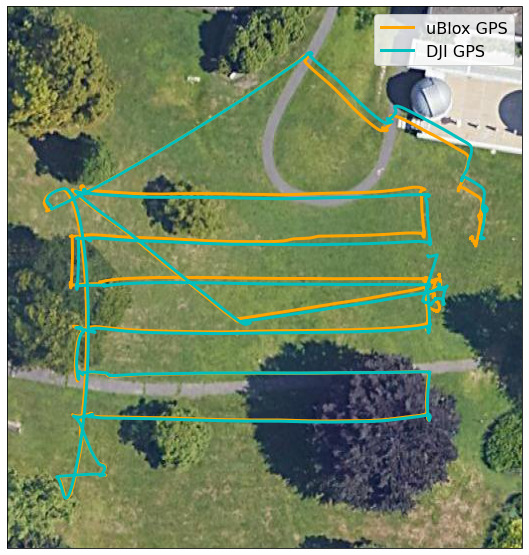

In [5]:
# Plot the data against a variety of basemaps

# choose a plot background
#PLOT_BG = cimgt.Stamen('toner') # black&white lines with street names
#PLOT_BG = cimgt.Stamen('toner-background') # same as toner but no names
#PLOT_BG = cimgt.Stamen('toner-lite') # same as toner but lighter/lower contrast
#PLOT_BG = cimgt.OSM() # open street map
#PLOT_BG = cimgt.GoogleTiles(style='street') # google maps
PLOT_BG = cimgt.GoogleTiles(style='satellite') # google earth
BORDER = 0.00005

fig = plt.figure()

# add a subplot in the coordinate system of the tiles
ax = fig.add_subplot(1, 1, 1, projection=PLOT_BG.crs) 

# set the extents of the plot to be a box around the data
ax.set_extent([min(df.Lon)-BORDER, max(df.Lon)+BORDER, min(df.Lat)-BORDER, max(df.Lat)+BORDER], crs=ccrs.Geodetic())

# use cartopy to add a satellite map to the background
ax.add_image(PLOT_BG, 20) # the number here sets the zoom level (0 is far, 20 is very zoomed in)

# plot the data, transformed into the coordinate system of our plot
plt.plot(df.Lon, df.Lat, 'orange', linewidth=3, transform=ccrs.Geodetic(), label="uBlox GPS")
plt.plot(dji_df.LonMov, dji_df.LatMov, 'c', linewidth=3, transform=ccrs.Geodetic(), label="DJI GPS")

plt.legend()

# label and save
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.savefig("groundtrack.png")
plt.show()



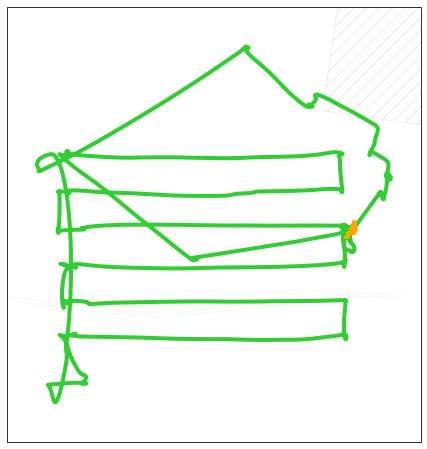

In [8]:
# Visualize the flag columns by conditionally coloring the plot

PLOT_BG = cimgt.Stamen('toner-lite')

BORDER = 0.00005

fig = plt.figure()

# add a subplot in the coordinate system of the tiles
ax = fig.add_subplot(1, 1, 1, projection=PLOT_BG.crs) 

# set the extents of the plot to be a box around the data
ax.set_extent([min(df.Lon)-BORDER, max(df.Lon)+BORDER, min(df.Lat)-BORDER, max(df.Lat)+BORDER], crs=ccrs.Geodetic())

# use cartopy to add a satellite map to the background
#ax.add_image(PLOT_BG, 20, interpolation='spline36')
ax.add_image(PLOT_BG, 20)

# plot the data, transformed into the coordinate system of our plot
df_diff = df.where(df.diffCorrected == 2)
df_nodiff = df.where(df.diffCorrected == 0)
plt.plot(df_diff.Lon, df_diff.Lat, 'c', linewidth=4, transform=ccrs.Geodetic(), label="GPS", color='limegreen')
plt.plot(df_nodiff.Lon, df_nodiff.Lat, 'c', linewidth=4, transform=ccrs.Geodetic(), label="GPS", color='orange')

# label and save
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("RTK_status.png")
plt.show()


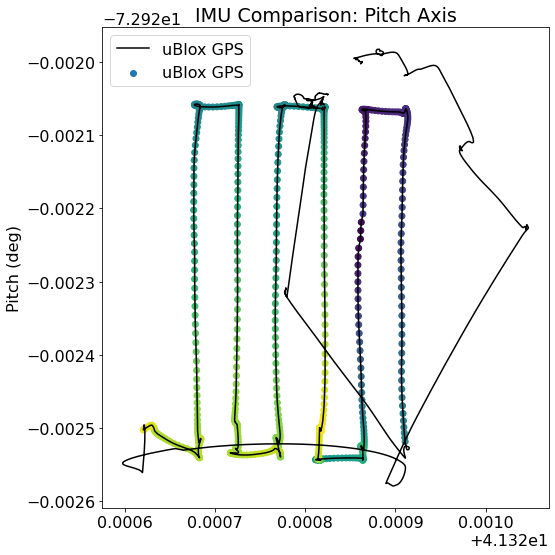

In [53]:
# take a rolling average to normalize and detect potato chipping

tstart_dji = 27000
tstop_dji = 43000
#plt.scatter(dji_df.Lat[tstart_dji:tstop_dji], dji_df.Lon[tstart_dji:tstop_dji], c=dji_df.hmsl[tstart_dji:tstop_dji], label="Onboard/DJI GPS")
#plt.plot(dji_df.Lat, dji_df.Lon, c="black", label="Onboard/DJI GPS")

tstart_ublox = 2000
tstop_ublox = 2900
#plt.scatter(df.Lat[tstart_ublox:tstop_ublox], df.Lon[tstart_ublox:tstop_ublox], c=df.HMSL[tstart_ublox:tstop_ublox], label="uBlox GPS")
plt.scatter(df.Lat[tstart_ublox:tstop_ublox], df.Lon[tstart_ublox:tstop_ublox], c=df.Height[tstart_ublox:tstop_ublox], label="uBlox GPS")
plt.plot(df.Lat, df.Lon, c="black", label="uBlox GPS")

#plt.scatter(df[trim_start:trim_stop].UTC, df[trim_start:trim_stop].pitch, label="BNO-055 IMU")
#plt.grid()
#plt.xlim(min(df[trim_start:trim_stop].UTC),max(df[trim_start:trim_stop].UTC))
#plt.ylim(min(df[trim_start:trim_stop].pitch)-0.0001,max(df[trim_start:trim_stop].pitch)+0.0001)
#plt.xticks(rotation=30)
#plt.ylabel("Pitch (deg)")
plt.title("Ground trace with height coloring")
plt.legend()
plt.tight_layout()
plt.savefig("potato.jpg")
plt.show()


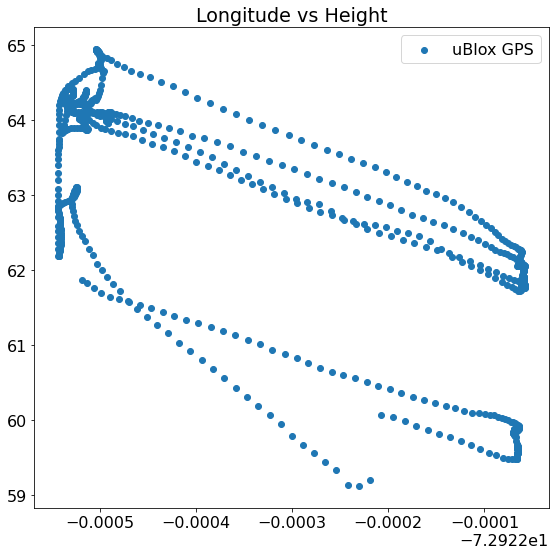

In [56]:
# take a rolling average to normalize and detect potato chipping

tstart_dji = 27000
tstop_dji = 43000
#plt.scatter(dji_df.Lat[tstart_dji:tstop_dji], dji_df.Lon[tstart_dji:tstop_dji], c=dji_df.hmsl[tstart_dji:tstop_dji], label="Onboard/DJI GPS")
#plt.plot(dji_df.Lat, dji_df.Lon, c="black", label="Onboard/DJI GPS")

tstart_ublox = 2000
tstop_ublox = 2900
#plt.scatter(df.Lat[tstart_ublox:tstop_ublox], df.Lon[tstart_ublox:tstop_ublox], c=df.HMSL[tstart_ublox:tstop_ublox], label="uBlox GPS")
plt.scatter(df.Lon[tstart_ublox:tstop_ublox], df.Height[tstart_ublox:tstop_ublox], label="uBlox GPS")

#plt.scatter(df[trim_start:trim_stop].UTC, df[trim_start:trim_stop].pitch, label="BNO-055 IMU")
#plt.grid()
#plt.xlim(min(df[trim_start:trim_stop].UTC),max(df[trim_start:trim_stop].UTC))
#plt.ylim(min(df[trim_start:trim_stop].pitch)-0.0001,max(df[trim_start:trim_stop].pitch)+0.0001)
#plt.xticks(rotation=30)
plt.title("Longitude vs Height")
plt.legend()
plt.tight_layout()
plt.savefig("morepotato.jpg")
plt.show()


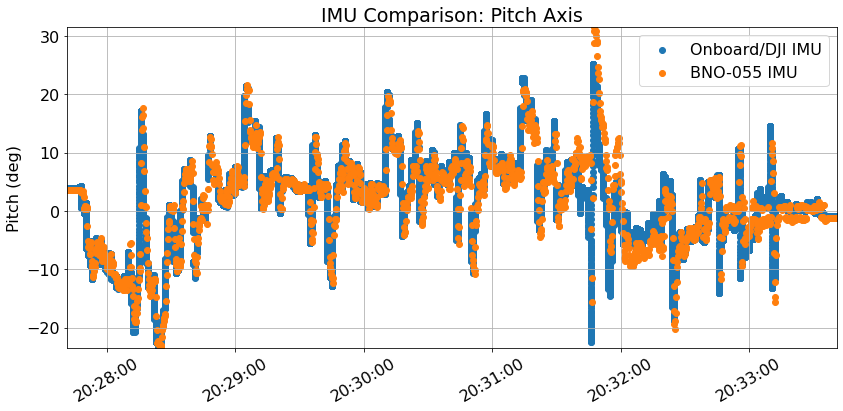

In [95]:
# Plot a variable over time
# This time I picked Latitude, but the process is the same for any of them

fig = plt.figure(figsize=(12,6))
ax = plt.gca()

# Format the timestamp on the x axis as HH:MM:SS
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
ax.xaxis_date()

# Uncomment this line to format a latitude axis
#ax.yaxis.set_major_formatter(LATITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LATITUDE_FORMATTER)

# Uncomment this line to format a longitude axis 
#ax.yaxis.set_major_formatter(LONGITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LONGITUDE_FORMATTER)

trim_start = 1700
trim_stop = 3500
plt.scatter(dji_df.UTC, dji_df.pitch, label="Onboard/DJI IMU")
plt.scatter(df[trim_start:trim_stop].UTC, df[trim_start:trim_stop].pitch, label="BNO-055 IMU")
plt.grid()
plt.xlim(min(df[trim_start:trim_stop].UTC),max(df[trim_start:trim_stop].UTC))
plt.ylim(min(df[trim_start:trim_stop].pitch)-0.0001,max(df[trim_start:trim_stop].pitch)+0.0001)
plt.xticks(rotation=30)
plt.ylabel("Pitch (deg)")
plt.title("IMU Comparison: Pitch Axis")
plt.legend()
plt.tight_layout()
plt.savefig("IMU_pitch.jpg")
plt.show()


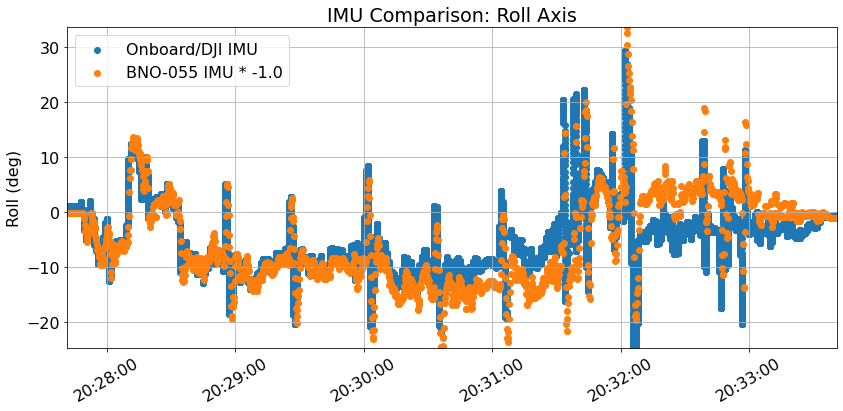

In [93]:
# Plot a variable over time
# This time I picked Latitude, but the process is the same for any of them

fig = plt.figure(figsize=(12,6))
ax = plt.gca()

# Format the timestamp on the x axis as HH:MM:SS
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
ax.xaxis_date()

trim_start = 1700
trim_stop = 3500
plt.scatter(dji_df.UTC, dji_df.roll, label="Onboard/DJI IMU")
plt.scatter(df[trim_start:trim_stop].UTC, df[trim_start:trim_stop].roll*(-1.0), label="BNO-055 IMU * -1.0")
plt.grid()
plt.xlim(min(df[trim_start:trim_stop].UTC),max(df[trim_start:trim_stop].UTC))
plt.ylim(min(df[trim_start:trim_stop].roll*(-1.0))-0.0001,max(df[trim_start:trim_stop].roll*(-1.0))+0.0001)
plt.xticks(rotation=30)
plt.ylabel("Roll (deg)")
plt.title("IMU Comparison: Roll Axis")
plt.legend()
plt.tight_layout()
plt.savefig("IMU_roll.jpg")
plt.show()


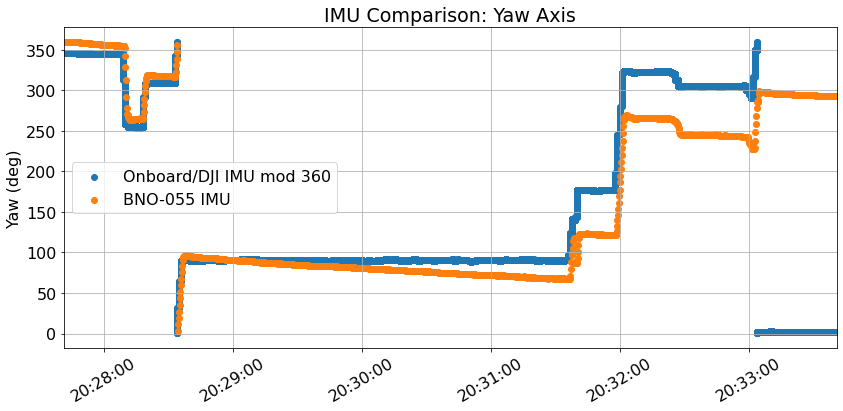

In [94]:
# Plot a variable over time
# This time I picked Latitude, but the process is the same for any of them

fig = plt.figure(figsize=(12,6))
ax = plt.gca()

# Format the timestamp on the x axis as HH:MM:SS
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
ax.xaxis_date()

# Uncomment this line to format a latitude axis
#ax.yaxis.set_major_formatter(LATITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LATITUDE_FORMATTER)

# Uncomment this line to format a longitude axis 
#ax.yaxis.set_major_formatter(LONGITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LONGITUDE_FORMATTER)

trim_start = 1700
trim_stop = 3500
plt.scatter(dji_df.UTC, dji_df.yaw%360.0, label="Onboard/DJI IMU mod 360")
plt.scatter(df[trim_start:trim_stop].UTC, df[trim_start:trim_stop].yaw, label="BNO-055 IMU")
plt.grid()
plt.xlim(min(df[trim_start:trim_stop].UTC),max(df[trim_start:trim_stop].UTC))
#plt.ylim(min(df[trim_start:trim_stop].yaw)-0.0001,max(df[trim_start:trim_stop].yaw)+0.0001)
plt.xticks(rotation=30)
plt.ylabel("Yaw (deg)")
plt.title("IMU Comparison: Yaw Axis")
plt.legend()
plt.tight_layout()
plt.savefig("IMU_yaw.jpg")
plt.show()


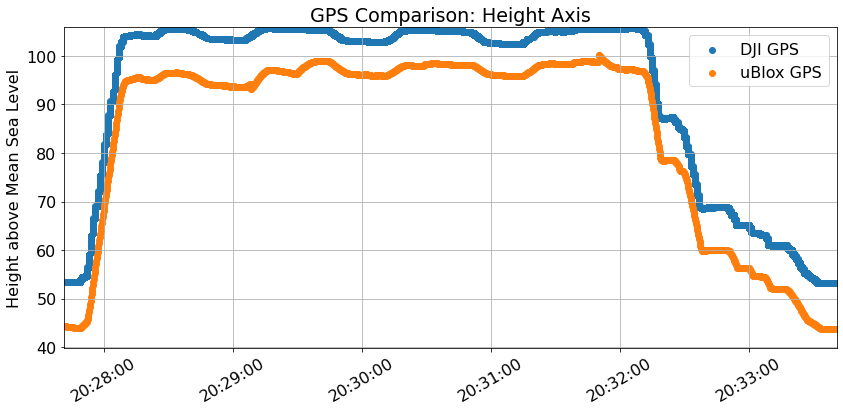

In [10]:
# Plot a variable over time
# This time I picked Latitude, but the process is the same for any of them

fig = plt.figure(figsize=(12,6))
ax = plt.gca()

# Format the timestamp on the x axis as HH:MM:SS
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
ax.xaxis_date()

# Uncomment this line to format a latitude axis
#ax.yaxis.set_major_formatter(LATITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LATITUDE_FORMATTER)

# Uncomment this line to format a longitude axis 
#ax.yaxis.set_major_formatter(LONGITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LONGITUDE_FORMATTER)

trim_start = 1700
trim_stop = 3500
plt.scatter(dji_df.UTC, dji_df.hmsl, label="DJI GPS")
plt.scatter(df[trim_start:trim_stop].UTC, df[trim_start:trim_stop].HMSL, label="uBlox GPS")
plt.grid()
plt.xlim(min(df[trim_start:trim_stop].UTC),max(df[trim_start:trim_stop].UTC))
plt.ylim(min(min(df[trim_start:trim_stop].HMSL),min(dji_df.hmsl))-0.0001,max(max(df[trim_start:trim_stop].HMSL),max(dji_df.hmsl))+0.0001)
plt.xticks(rotation=30)
plt.ylabel("Height above Mean Sea Level")
plt.title("GPS Comparison: Height Axis")
plt.legend()
plt.tight_layout()
plt.savefig("HMSL_comparison.jpg")
plt.show()